In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/Dados_tratados.csv')

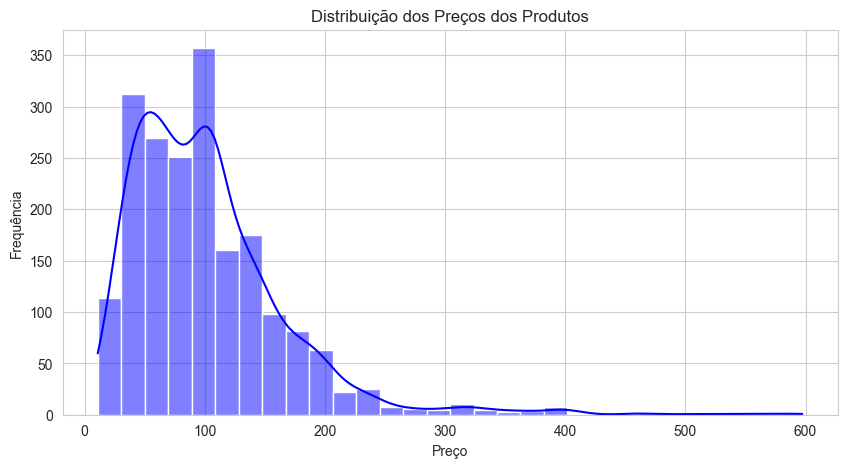

In [27]:
# Configuração do gráfico
plt.figure(figsize=(10, 5))
sns.histplot(df["Preço"], bins=30, kde=True, color="blue")
plt.title("Distribuição dos Preços dos Produtos")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()


### 📌 Observações:
*  A maioria dos produtos está concentrada na faixa de preço mais baixa (entre R$ 0 e R$ 200).
*  Poucos produtos são muito caros (acima de R$ 300).
*  A distribuição é assimétrica para a direita → predominância de produtos baratos.

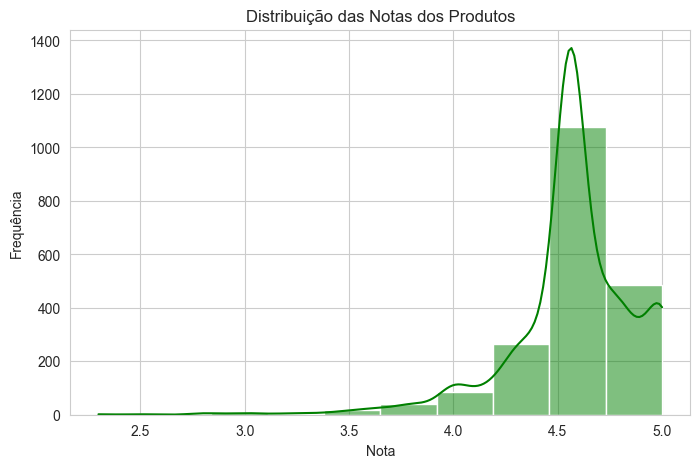

In [28]:
# Configuração do gráfico
plt.figure(figsize=(8, 5))
sns.histplot(df["Nota"], bins=10, kde=True, color="green")
plt.title("Distribuição das Notas dos Produtos")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()


📌 Observações:
*  A maioria dos produtos tem uma Nota entre 4.0 e 5.0.
*  Poucos produtos com Avaliações Abaixo de 3.5.
*  Clientes tendem a dar notas altas → assimetria à direita.



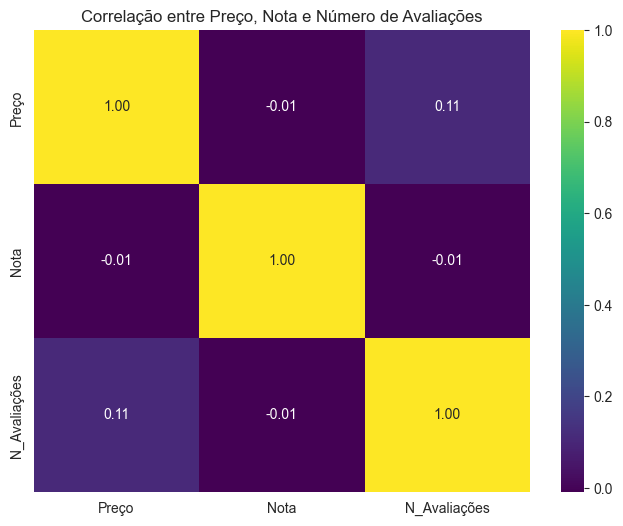

In [29]:
# Correlação entre Variáveis
correlation_matrix = df[["Preço", "Nota", "N_Avaliações"]].corr()

# Criando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlação entre Preço, Nota e Número de Avaliações")
plt.show()

📌 Observações:
* Correlações positivas entre:
 * Preço e Número de Avaliações
 * Preço e Nota
 * Nota e Número de Avaliações
* Todas as correlações são fracas (< 0.4), indicando relações lineares fracas.



🔝 Top 10 produtos mais avaliados

In [30]:
# Visualizar os 10 produtos mais Avaliados
top_avaliados = df.nlargest(10, "N_Avaliações")
top_avaliados[["Título", "Preço", "Nota", "N_Avaliações"]]

,Título,Preço,Nota,N_Avaliações
136,Kit 5 Camisetas Masculinas Slim Fit Básicas A...,239.110000,4.5,9077.0
1736,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,199.900000,4.7,5691.0
856,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,199.900000,4.7,5688.0
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,199.900000,4.7,5682.0
1547,Kit 21 Pçs Maternidade Roupa De Bebê Frete Gratis,102.705713,4.4,3043.0
682,Kit 21 Pçs Maternidade Roupa De Bebê Frete Gratis,102.705713,4.4,3042.0
1735,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,232.890000,4.5,3037.0
855,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,232.890000,4.5,3036.0
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,232.890000,4.5,3034.0
1836,Saida De Maternidade Menina 5 Peças Charmosa V...,88.780000,4.7,2983.0


🔻 Top 10 produtos menos avaliados

In [31]:
# Visualizar os 10 produtos menos Avaliados
menos_avaliados = df.nsmallest(10, "N_Avaliações")
menos_avaliados[["Título", "Preço", "Nota", "N_Avaliações"]]


,Título,Preço,Nota,N_Avaliações
14,Bermuda Feminina Puma Lemlem Bike,209.990000,4.560936,0.0
15,Bermuda Camuflada Poly Ripstop 6 Bolsos Safo...,102.705713,4.560936,0.0
20,Kit 10 Short Jeans Feminino Com Cintura Alta A...,199.990000,4.560936,0.0
26,Roupa Chef De Cozinha Dolmã Masculino Manga Cu...,68.540000,4.560936,0.0
30,Roupa Ere Umbanda Candomble,139.610000,4.560936,0.0
31,Kit Com 2 Shorts Feminino Básico Sem Costura L...,72.900000,4.560936,0.0
39,Kit 3 Short Laço Cintura Alta Shortinho Curto ...,110.690000,4.560936,0.0
51,Kit 3 Short Feminino Básico Sem Costura Loba R...,127.900000,4.560936,0.0
59,Kit 3 Bermudas Masculina Microfibra Forrada P...,139.900000,4.560936,0.0
61,Calça Jeans Levis 505 Masculina Tradicional,102.705713,4.560936,0.0


 Exploração de Categorias
🎯 Objetivo:
Descobrir quais categorias são mais populares com base no número de avaliações e analisar a relação entre nota, preço e categoria.


In [32]:
# Listar marcas únicas
#
print(df['Marca'].unique())

['toronto uniformes profissionais' 'lupo' 'zorba' 'mash' 'menina linda'
 'roupa zero grau' "levi's" 'sr apicultura' 'multimarcas' 'amandika kids'
 'gbgsports' 'poderoso baby moda acessórios' 'puma' 'safo' 'estilo fada'
 'imperio kids' 'ciacool' 'c. surf' 'stillger' 'atacadao beira mar'
 'rebel cat' 'm l freitas confecções' 'petit ateliê' 'paraíso da lingerie'
 'cigana dos ventos' 'importado' 'genérica' 'pérola' 'canario' 'neve'
 'outros' 'miracle baby' "men'spa" 'silvest lingerie'
 'moda shop roupa feminina' 'atack' 'bebê bacana' 'celi'
 'esquarcio import fashion tape' 'descartes' 'laura baby'
 'salve jorge guerreiro' 'batutinhas baby' 'megalupe' 'magazine kubo'
 'moov sports' 'brins' 'kick' 'djiele' 'bamborra'
 'lacre de autenticidade para tags' 'mkids' 'stillger jeans' 'nacional'
 'casambiente' 'atelie mundo daju' 'amk kids' 'mizuno' 'shop smille'
 'giovanna ballet' 'under armour' 'tactel slim calça ziper' 'lcb' 'sulebe'
 'slick' 'voluccy' 'thamuz' 'roupas térmicas 20 anos' 'sawary j

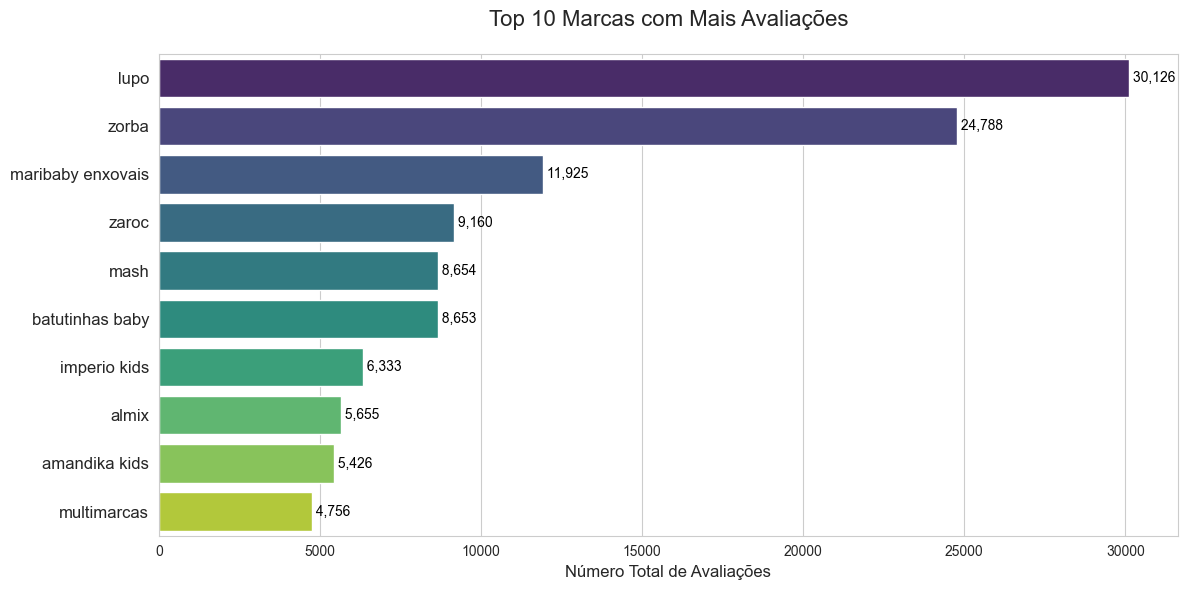

In [37]:
# Agrupar o número de avaliações por marca
top_marcas = df.groupby('Marca')['N_Avaliações'].sum().sort_values(ascending=False).head(10)
top_marcas_df = top_marcas.reset_index()  # Convertendo para DataFrame

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de barras com `hue` correto
barplot = sns.barplot(
    data=top_marcas_df,
    x='N_Avaliações',
    y='Marca',
    hue='Marca',               # usar a própria marca como cor
    palette='viridis',
    legend=False
)

# Título e ajustes visuais
plt.title('Top 10 Marcas com Mais Avaliações', fontsize=16, pad=20)
plt.xlabel('Número Total de Avaliações', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Adicionar valores nas barras
for i, value in enumerate(top_marcas_df['N_Avaliações']):
    barplot.text(value, i, f' {value:,.0f}',
                 va='center', ha='left',
                 fontsize=10, color='black')

plt.tight_layout()
plt.show()

📌 Observações:
   * Lupo e Zorba dominam amplamente em número de avaliações, sendo marcas mais conhecidas ou com maior volume de vendas.

   *  As demais marcas possuem uma queda mais gradual, o que pode indicar um mercado mais pulverizado abaixo do topo.

   * A categoria de roupas infantis aparece forte com várias marcas no ranking (ex: Batutinhas Baby, Amandinha Kids, Império Kids), mostrando um nicho relevante.

# Análise de Categorias
🎯 Objetivo: Identificar as categorias mais populares com base no número de avaliações

<Axes: title={'center': 'Top Categorias por Número de Avaliações'}, xlabel='Categoria'>

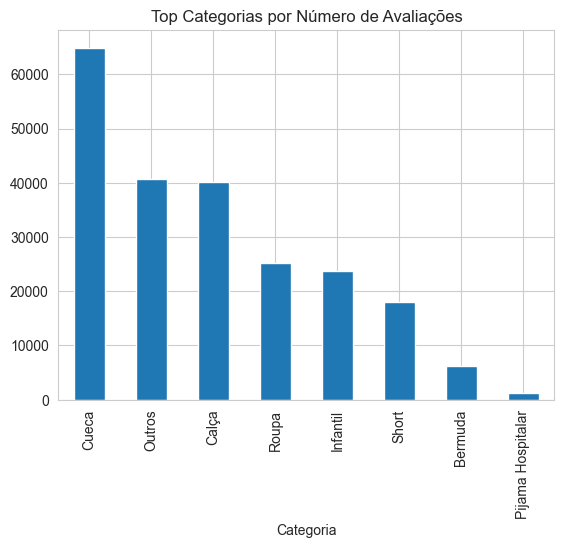

In [46]:
def extrair_categoria(titulo):
    titulo = titulo.lower()
    if 'cueca' in titulo:
        return 'Cueca'
    elif 'calça' in titulo:
        return 'Calça'
    elif 'short' in titulo:
        return 'Short'
    elif 'pijama' in titulo or 'scrub' in titulo:
        return 'Pijama Hospitalar'
    elif 'infantil' in titulo:
        return 'Infantil'
    elif 'bermuda' in titulo:
        return 'Bermuda'
    elif 'roupa' in titulo:
        return 'Roupa'
    else:
        return 'Outros'

df['Categoria'] = df['Título'].apply(extrair_categoria)

df.groupby('Categoria')['N_Avaliações'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top Categorias por Número de Avaliações')



📌 Observações:






# 🎯 Objetivo:

 * Entender quais categorias de produtos se destacam em relação a:

 * Quantidade de avaliações

 * Notas médias

 * Faixa de preço

 * Popularidade (quantidade vendida)

 Gráfico de Boxplot: Preço por Categoria

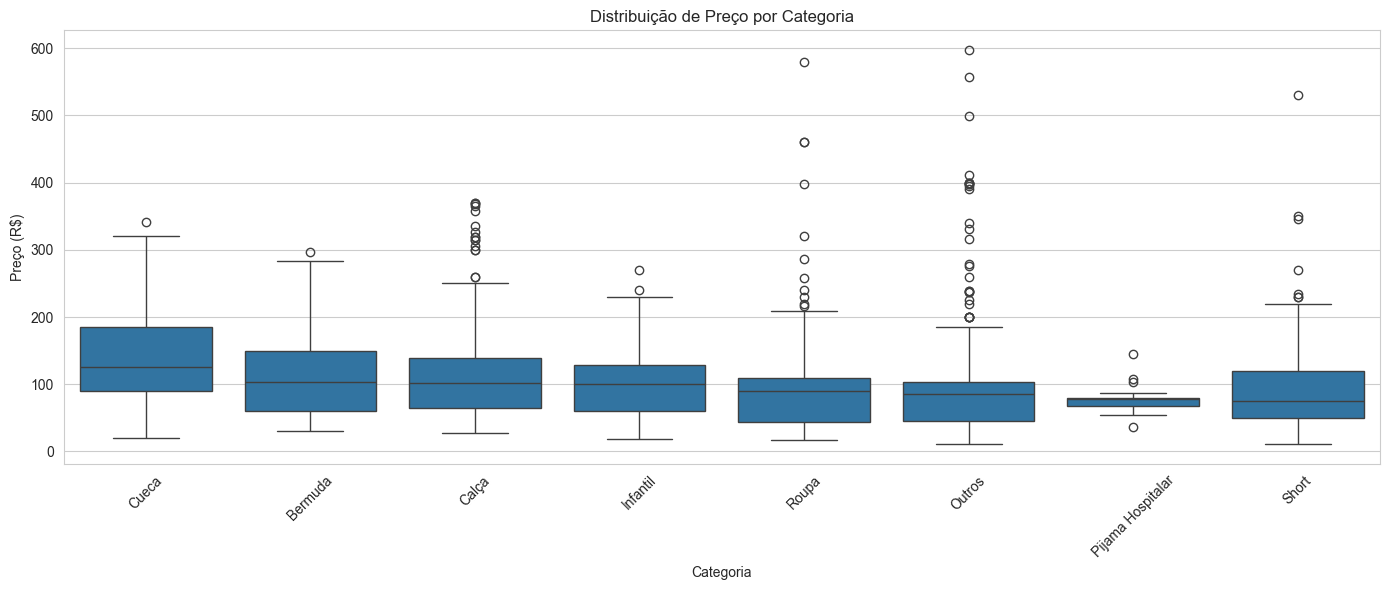

In [94]:
plt.figure(figsize=(14, 6))
ordem = df.groupby('Categoria')['Preço'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Categoria', y='Preço', order=ordem)
plt.xticks(rotation=45)
plt.title('Distribuição de Preço por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço (R$)')
plt.tight_layout()
plt.show()

# Dispersão: Preço vs. Número de Avaliações

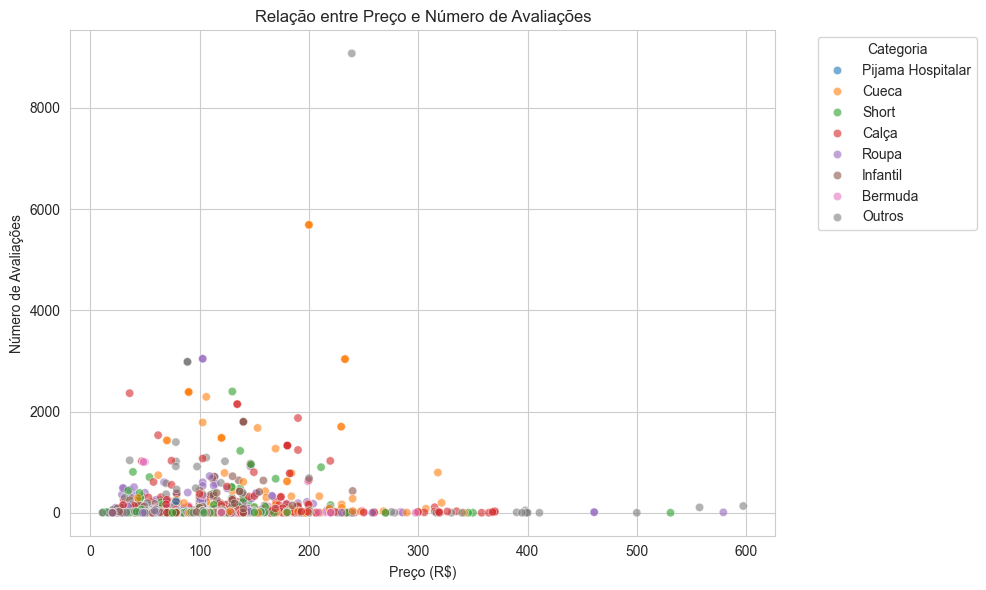

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preço', y='N_Avaliações', hue='Categoria', alpha=0.6)

plt.title('Relação entre Preço e Número de Avaliações')
plt.xlabel('Preço (R$)')
plt.ylabel('Número de Avaliações')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoria')
plt.tight_layout()
plt.show()

# Análise de Correlação entre Variáveis Numéricas
A ideia aqui é identificar possíveis relações entre variáveis como Preço, Nota, N_Avaliações, Desconto,


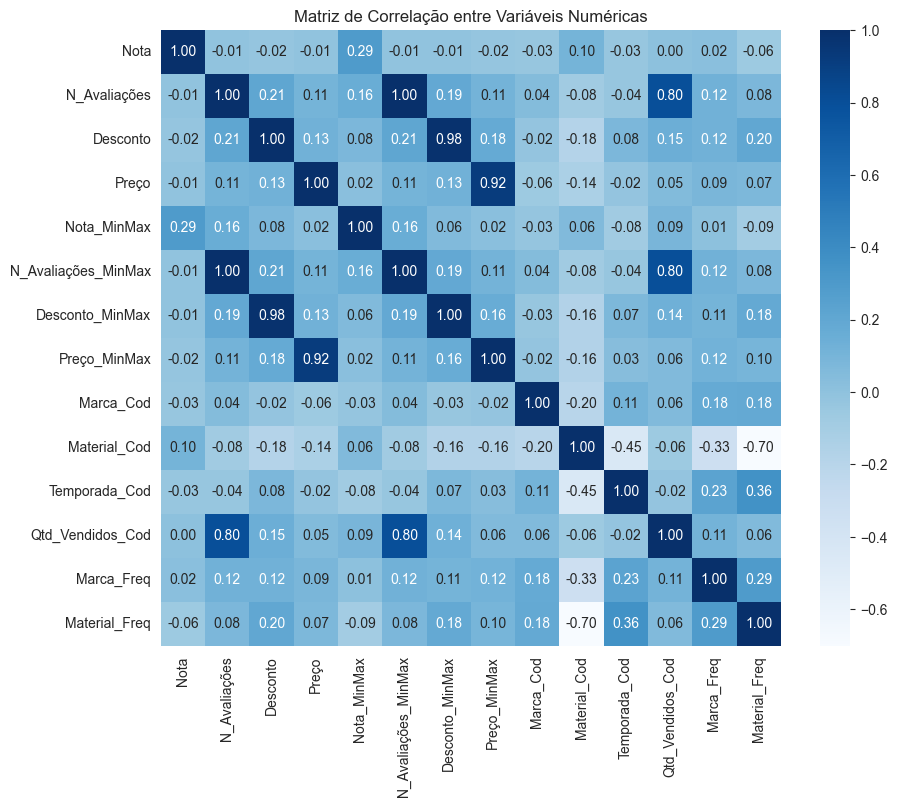

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Identificar Oportunidades Ocultas

In [85]:
# Top 10 produtos com nota alta mas poucos vendidos
produtos_ocultos = df[(df['Nota'] >= 4.5) & (df['N_Avaliações'] < 10)]
produtos_ocultos[['Título', 'Nota', 'N_Avaliações', 'Qtd_Vendidos', 'Preço']].sort_values(by='Nota', ascending=False)


,Título,Nota,N_Avaliações,Qtd_Vendidos,Preço
55,Calça Jeans Levis 511 Original Slim Fit Elastano,5.0,3.0,+5,102.705713
64,Roupas Femininas Bermuda Feminina Sarja Bolso ...,5.0,6.0,+100,53.900000
1877,Conjunto De Ballet Collant E Saia Cós Body Rosa,5.0,2.0,+5,58.050000
1878,Kit C/ 10 Short Segunda Pele Para Usar Com Rou...,5.0,1.0,+5,119.390000
1880,3 Conjunto Short Saia Rodado Top Tapa Bumbum R...,5.0,4.0,+25,159.120000
...,...,...,...,...,...
418,Faixa De Cabeça Fina On/off (thin Headband) Co...,4.5,2.0,+5,108.990000
426,Bermudas Cós Alto Com Elastano Até O Joelho Ro...,4.5,4.0,+25,49.900000
273,60 Separadores De Roupas Numerador Araras Sem ...,4.5,4.0,+25,67.990000
166,Calça Oxford Branco Elastico Umbanda Açougue R...,4.5,2.0,+100,29.900000


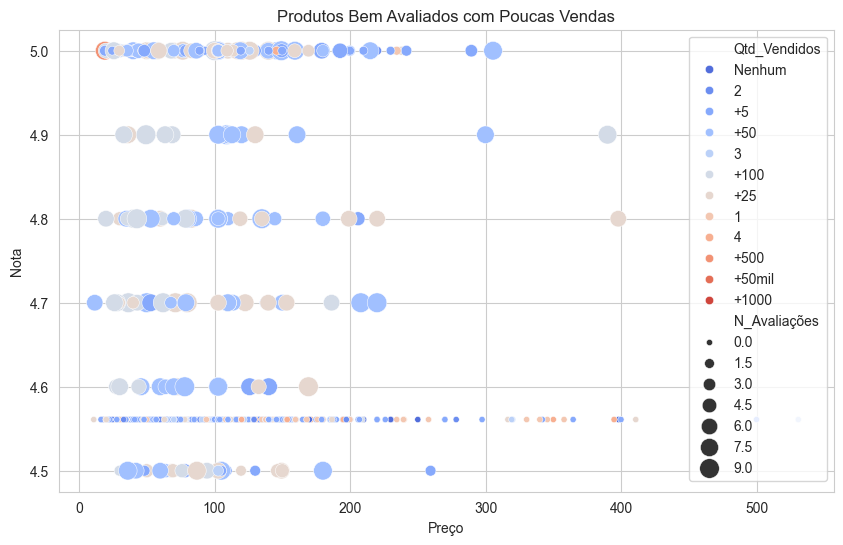

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=produtos_ocultos, x='Preço', y='Nota', hue='Qtd_Vendidos', palette='coolwarm', size='N_Avaliações', sizes=(20, 200))
plt.title('Produtos Bem Avaliados com Poucas Vendas')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.show()


### Conclusões Finais
* Produtos mais acessíveis dominam o mercado.

* Notas tendem a ser altas — comportamento comum em avaliações de e-commerce.

* Correlações fracas indicam que outros fatores (como marca ou categoria) podem influenciar mais.

* Foco em marcas e categorias populares pode otimizar decisões de marketing e estoque.